In [1]:
include("../lib/show_image.jl")
include("../lib/show_compression.jl")
include("../src/Lab_3.jl")

using FileIO, Colors, ImageCore, ImageShow, ImageMagick, Serialization

using .Lab_3.create_tree
using .show_image
using .show_compression

LoadError: LoadError: UndefVarError: `singularvalues` not defined in `Main.show_image.tree_node`
Suggestion: check for spelling errors or missing imports.
in expression starting at /Users/grzegorzgrudzien/Desktop/STUDIA/AlgorytmyMacierzowe/Algorytmy_Macierzowe/Lab_3/lib/tree_node.jl:1
in expression starting at /Users/grzegorzgrudzien/Desktop/STUDIA/AlgorytmyMacierzowe/Algorytmy_Macierzowe/Lab_3/lib/show_image.jl:1

In [ ]:
using LinearAlgebra, Random

# Helper: build compression tree and visualize block borders (thickness ~ rank)
function compress_and_show(A; r::Int=4, m::Float64=0.01, relative::Bool=false, base_thickness::Int=1, label::String="")
    n, p = size(A)
    @assert n == p "Expected square matrix"
    println("\n--- ", label, " ---")
    println("size = ", size(A), ", r = ", r, ", m = ", m, ", relative = ", relative)
    root = compression_tree(A, 1, n, 1, n, r, m, relative)
    return show_comp_thick(root; pad_square=true, base_thickness=base_thickness)
end

Random.seed!(1234)

n = 64  # >= 50

# Settings requested: absolute mode, max rank 4, threshold 0.01
r = 4
m = 0.01
relative = false

false

In [3]:

Random.seed!(1234)

n = 1024  # >= 50

# Settings requested: absolute mode, max rank 4, threshold 0.01
r = 4
m = 0.0001
relative = false

false


--- Diagonal (1024×1024) ---
size = (1024, 1024), r = 4, m = 0.0001, relative = false


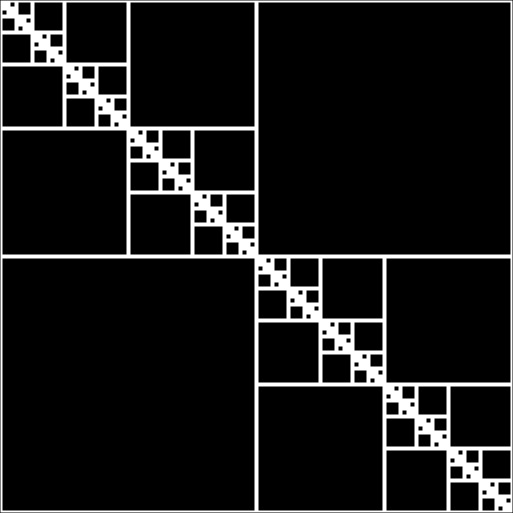

In [ ]:

# 1) Big diagonal matrix
d = rand(n)
A_diag = Matrix(Diagonal(d))
compress_and_show(A_diag; r=r, m=m, relative=relative, base_thickness=1, label="Diagonal ($(n)×$(n))")


In [ ]:

# 2) Big tridiagonal matrix (classic SPD banded)
dl = fill(-1.0, n - 1)
d0 = fill( 2.0, n)
du = fill(-1.0, n - 1)
A_tridiag = Matrix(Tridiagonal(dl, d0, du))
compress_and_show(A_tridiag; r=r, m=m, relative=relative, base_thickness=1, label="Tridiagonal ($(n)×$(n))")



--- Tridiagonal (1024×1024) ---
size = (1024, 1024), r = 4, m = 0.0001, relative = false


ErrorException: No applicable_savers found for UNKNOWN


--- Banded offsets ±64 (1024×1024) ---
size = (1024, 1024), r = 4, m = 0.0001, relative = false


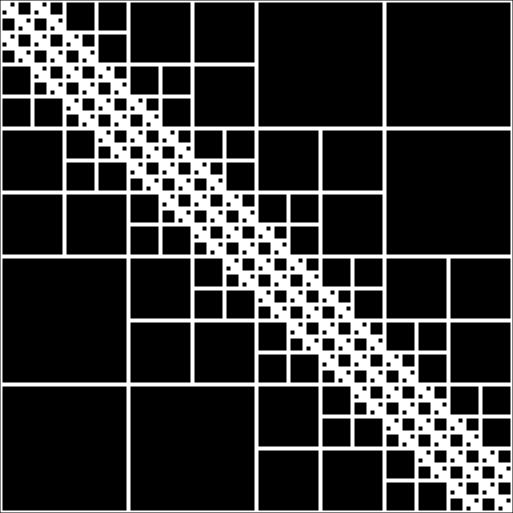

In [ ]:
# 3) “Far” off-diagonals: banded matrix with offsets ±k (k > 1)
k = 64  # distance from the main diagonal
A_far = diagm(-k => fill(-1.0, n - k), 0 => fill(2.0, n), k => fill(-1.0, n - k))
compress_and_show(A_far; r=r, m=m, relative=relative, base_thickness=1, label="Banded offsets ±$(k) ($(n)×$(n))")



--- Dense random (1024×1024) ---
size = (1024, 1024), r = 4, m = 0.0001, relative = false


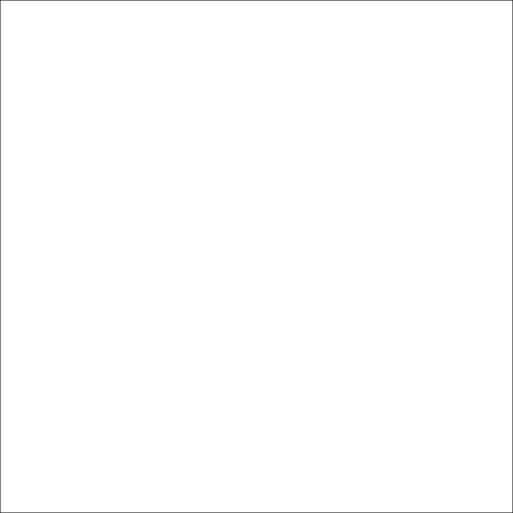

In [ ]:

# 4) Big dense random matrix
A_dense = randn(n, n)
compress_and_show(A_dense; r=r, m=m, relative=relative, base_thickness=1, label="Dense random ($(n)×$(n))")